# <p style="text-align: justify;"><div class="alert alert-info" role="alert">Multiple Linear Regression with genetic predictors coupled with Principal Components Analysis</div></p>

## `Ana González Guerra` 

### ` Student of the master in Data Science at the University of Cantabria` 

## Index<a class="anchor" id="index"></a>
* [Loading data](#1)
    * [Genetic predictors](#2)
    * [Target variables](#3)
* [Train/test partition](#4)
* [Multiple Linear Regression coupled with PCA](#5)
    * [Training the model](#6)
    * [Cross-validation](#7)
        * [RMSE error in the test prediction after cross-validation](#8)
   

## Loading data <a class="anchor" id ="1" ></a>

* [Returning to the index of contents](#index)

### Genetic predictors <a class="anchor" id="2"></a>

* [Returning to the index of contents](#index)

Cargamos los datos de las variables genéticas codificadas, donde se ha traducido cada nivel de las mismas en 1, 2 y 3 por orden alfabético.

In [1]:
handle_genetic <-  read.csv('handle_genetic_cod_28_04_20.csv')

head(handle_genetic)

rs10034661,rs10063949,rs1024610,rs1024611,rs1042713,rs1045485,rs10491003,rs1049305,rs1049434,rs10497520,...,rs8111989,rs8192678,rs824205,rs833070,rs884736,rs921943,rs9469199,rs970547,rs9902453,rs9939609
3,2,2,3,1,2,3,2,2,2,...,2,2,2,2,2,2,2,1,2,1
3,2,2,2,2,3,3,3,1,1,...,2,2,1,2,2,2,3,2,2,3
3,3,2,3,2,3,3,2,1,1,...,2,2,2,2,2,1,3,2,2,1
3,3,3,2,2,3,3,1,2,1,...,2,2,2,2,2,2,3,1,1,1
3,2,3,2,3,1,3,2,3,1,...,2,2,2,3,3,3,3,1,2,2
3,2,3,2,2,3,3,2,2,1,...,2,2,2,3,2,2,3,2,3,3


### Target variables <a class="anchor" id="3"></a>

* [Returning to the index of contents](#index)

In [2]:
handle_target <- read.csv('handle_target_fusion_31_03_20.csv', row.name = 1)

head(handle_target)

,W1MaxWAbs,W1MaxWRel,W1maxRPM,W1MedWAbs,W1MedWRel,W1medRPM,W2MaxWAbs,W2MaxWRel,W2maxRPM,W2MedWAbs,...,W2DifWRelFFM1,W2DifWRelFFM2,W1.2MaxDifWAbs,W1.2MaxDifWRel,W1.2MaxDifWRelFFM1,W1.2MaxDifWRelFFM2,W1.2MedDifWAbs,W1.2MedDifWRel,W1.2MedDifWRelFFM1,W1.2MedDifWRelFFM2
0,398,8.747253,122,206,4.527473,100,397,8.725275,122,224,...,4.479981,4.544592,1,0.02197802,0.02589585,0.02626932,-18,-0.39560440,-0.46612522,-0.47284774
4,511,8.964912,128,294,5.157895,109,523,9.175439,122,295,...,4.552187,4.889881,-12,-0.21052632,-0.23958880,-0.25736216,-1,-0.01754386,-0.01996573,-0.02144685
7,524,10.174757,130,262,5.087379,107,476,9.242718,125,245,...,4.958966,5.566747,48,0.93203883,1.03043453,1.15672661,17,0.33009709,0.36494556,0.40967401
8,541,8.868852,128,351,5.754098,118,472,7.737705,130,333,...,2.792441,3.020719,69,1.13114754,1.38617564,1.49949379,18,0.29508197,0.36161104,0.39117229
9,547,9.596491,143,291,5.105263,116,169,2.964912,130,302,...,-3.215855,-3.248973,378,6.63157895,9.13979775,9.23392354,-11,-0.19298246,-0.26597295,-0.26871206
11,553,9.701754,133,365,6.403509,121,556,9.754386,136,355,...,4.113095,4.408965,-3,-0.05263158,-0.06138948,-0.06580544,10,0.17543860,0.20463161,0.21935148


In [3]:
target <- handle_target['W1.2MedDifWRelFFM1']
head(target)

,W1.2MedDifWRelFFM1
0,-0.46612522
4,-0.01996573
7,0.36494556
8,0.36161104
9,-0.26597295
11,0.20463161


We create the dataframe for the analysis:

In [4]:
data_genetic <- cbind(target, handle_genetic)

head(data_genetic)

,W1.2MedDifWRelFFM1,rs10034661,rs10063949,rs1024610,rs1024611,rs1042713,rs1045485,rs10491003,rs1049305,rs1049434,...,rs8111989,rs8192678,rs824205,rs833070,rs884736,rs921943,rs9469199,rs970547,rs9902453,rs9939609
0,-0.46612522,3,2,2,3,1,2,3,2,2,...,2,2,2,2,2,2,2,1,2,1
4,-0.01996573,3,2,2,2,2,3,3,3,1,...,2,2,1,2,2,2,3,2,2,3
7,0.36494556,3,3,2,3,2,3,3,2,1,...,2,2,2,2,2,1,3,2,2,1
8,0.36161104,3,3,3,2,2,3,3,1,2,...,2,2,2,2,2,2,3,1,1,1
9,-0.26597295,3,2,3,2,3,1,3,2,3,...,2,2,2,3,3,3,3,1,2,2
11,0.20463161,3,2,3,2,2,3,3,2,2,...,2,2,2,3,2,2,3,2,3,3


## Train/test partition<a class="anchor" id="4"></a>

* [Returning to the index of contents](#index)

In [5]:
library(caret)

set.seed(10)
id_df <- createDataPartition(data_genetic$W1.2MedDifWRelFFM1,p = 0.85,list = FALSE)
data_genetic_train <- data_genetic[id_df,]
data_genetic_test <- data_genetic[-id_df,]

dim(data_genetic_train)

dim(data_genetic_test)

Warning message:
"package 'caret' was built under R version 3.6.2"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.6.3"

[1]  70 179

[1]  12 179

## Multiple Linear Regression coupled with PCA<a class="anchor" id="5"></a>

* [Returning to the index of contents](#index)

### Training the model <a class="anchor" id="6" ></a>

* [Returning to the index of contents](#index)

* #### We calculate the main components with the training set 

In [14]:
pca_train <- prcomp(data_genetic_train[, -1], scale. = TRUE)#no se tiene en cuenta la variable objetivo

In [15]:
str(pca)

List of 5
 $ sdev    : num [1:70] 2.58 2.56 2.49 2.39 2.37 ...
 $ rotation: num [1:178, 1:70] -0.0439 0.0425 0.1326 -0.101 -0.0581 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:178] "rs10034661" "rs10063949" "rs1024610" "rs1024611" ...
  .. ..$ : chr [1:70] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:178] 2.51 2.34 2.49 2.5 2.26 ...
  ..- attr(*, "names")= chr [1:178] "rs10034661" "rs10063949" "rs1024610" "rs1024611" ...
 $ scale   : Named num [1:178] 0.631 0.679 0.558 0.608 0.674 ...
  ..- attr(*, "names")= chr [1:178] "rs10034661" "rs10063949" "rs1024610" "rs1024611" ...
 $ x       : num [1:70, 1:70] -3.05 -2.39 -1.69 -0.9 1.23 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:70] "4" "7" "9" "11" ...
  .. ..$ : chr [1:70] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


There is a maximum of 70 principal components, because that is the maximum number of observations in training data.

In [16]:
dim(pca_train$x)[1]

[1] 70

* #### Importance variables analysis


In [9]:
perc_variance <- cumsum(pca$sdev^2)/sum(pca$sdev^2)*100

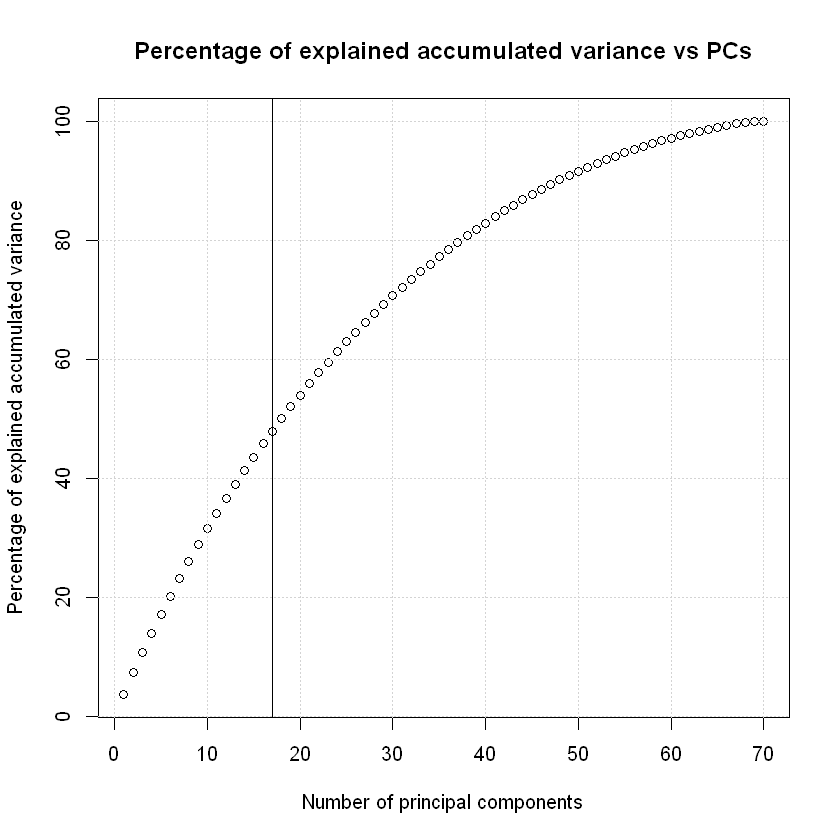

In [11]:
plot(perc_variance,main="Percentage of explained accumulated variance vs PCs",xlim=c(1,70),xlab = 'Number of principal components', ylab = 'Percentage of explained accumulated variance')
abline(v = which(pca$rotation[1,] == max(pca$rotation[1,])))
grid()

As it can be apreciated in the plot shown, the principal component to which target variable contribution is the biggest is:

In [17]:
pca_train$rotation[1,][which(pca_train$rotation[1,] == max(pca_train$rotation[1,]))]

PC17 
0.196622

With an acumulated proportion of explained variance of:

In [19]:
perc_variance[17]

[1] 47.99856

Then, in order to have consistent results, the smallest number of principal components for the analysis will be 17.

<p style="text-align: justify;">Now, it is shown a plot ot the target variable influence in the set of principal components obtained in train with the objetive of checking if for a certain number of principal component makes or does not make sense to use in the model the target variable.</p>

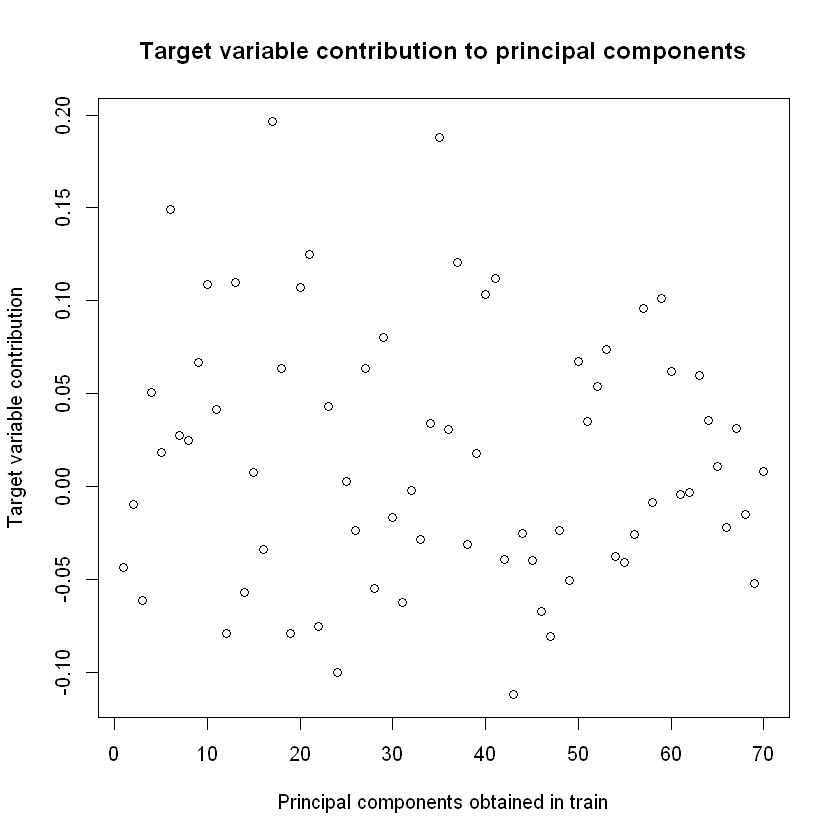

In [21]:
plot(pca_train$rotation[1,], main = 'Target variable contribution to principal components', 
     xlab = 'Principal components obtained in train', xlim = c(1,70),ylab = 'Target variable contribution')

The plot shows an uniform distribution of the target variable contribution, so it makes sense to keep the target variable for the model.

Now, in order to put in context the target variable contribution, we show down below an histogram of the original variables (included the target variable) contribution to the first principal component.

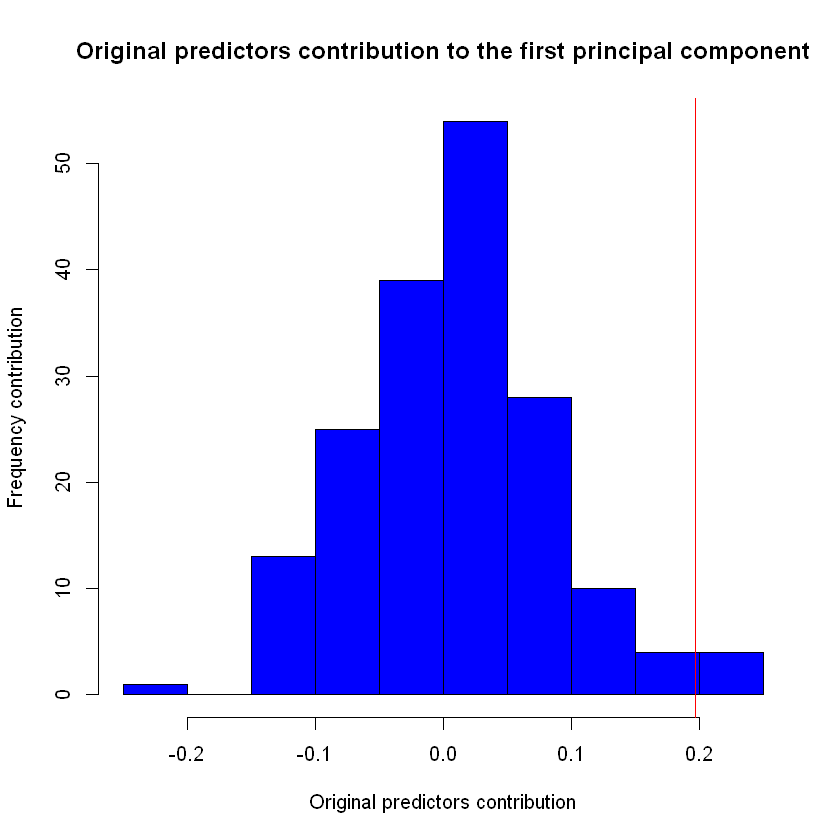

In [23]:
hist(pca_train$rotation[,1], breaks = 'FD',main = 'Original predictors contribution to the first principal component', 
     xlab = 'Original predictors contribution', ylab = 'Frequency contribution', col = 'blue', xlim=c(-0.25,0.25))
abline(v = max(pca_train$rotation[1,]), col = 'red')

The distribution is similar to the normal, with the target variable being one of the most contributing variables, located to the right of the distribution (contribution of 0.19). It seems that with greater frequency the variables of the original space contribute between a -0.1 and 0.1 to the main component.

The number of main components will be chosen taking into account that up to 95% of the explained variance is to be preserved.

In [24]:
names(perc_variance) <- 1 : length(perc_variance)

In [25]:
perc_variance[which(perc_variance >= 95)][1]

56 
95.28425

We have then that by choosing a total of 56 main components we can reach 95% of the explained variance

* #### We train the regression model with the training set and the number of main components indicated

In [26]:
library(pls)

Warning message:
"package 'pls' was built under R version 3.6.2"
Attaching package: 'pls'

The following object is masked from 'package:caret':

    R2

The following object is masked from 'package:stats':

    loadings



In [29]:
pcr_model <- pcr(formula = W1.2MedDifWRelFFM1 ~ ., data = data_genetic_train, scale. = TRUE, ncomp = 56)

We project the pcr model in test data:

In [33]:
pred_test <- predict(pcr_model, newdata = data_genetic_test, ncomp = 56)


## Cross-validation<a class="anchor" id="7"></a>

* [Returning to the index of contents](#index)

We use the MSE error as a validation criterion during cross-validation

In [34]:
set.seed(1)
pcr_model <- pcr(formula = W1.2MedDifWRelFFM1 ~ ., data = data_genetic_train, scale. = TRUE,
                  validation = "CV")
pcr_model_CV <- MSEP(pcr_model, estimate = "CV")
which.min(pcr_model_CV$val)

[1] 29

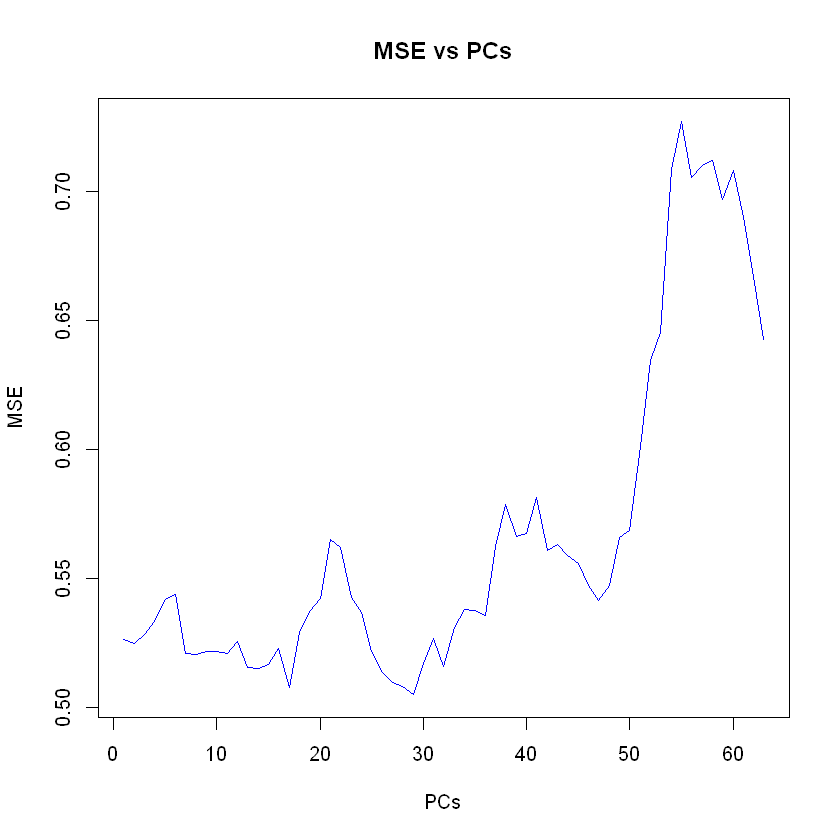

In [35]:
plot(pcr_model_CV$val, main = "MSE vs PCs", type = "l",
     ylab = "MSE",
     col = "blue", xlab = "PCs")


As the number of components increases the value of the MSE increases, but we found a minimum for 29 components.

#### RMSE error in the test prediction after cross-validation<a class="anchor" id="8"></a>

* [Returning to the index of contents](#index)

Now we convert the MSE error in RMSE error with the aim of having an error in the same units as target variable.

In [36]:
predictions <- predict(pcr_model, newdata = data_genetic_test, ncomp = 29)
test_mse <- sqrt(mean((predictions - data_genetic_test$W1.2MedDifWRelFFM1)^2))
test_mse

[1] 0.7798572

In [40]:
print(paste('Percentage of accumulated explained variance with the number of principal components optimized:',summary(pca)$importance[3,29]*100))

[1] "Percentage of accumulated explained variance with the number of principal components optimized: 69.25"
